In [1]:
# Standard Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy.fft as fft
import seaborn as sns
import time
from scipy.optimize import curve_fit

In [2]:
# Functions library:
# ---------------------------------------------------------------------------

# Function for standard analysis
def standard(data, name, save):
    # Title for analysis
    print(Lab.BOLD + Lab.UNDERLINE + "                ---- Standard analysis ----                " + Lab.UNDERLINE + Lab.END)
    
    # Pairplot
    print(Lab.UNDERLINE + Lab.BOLD + "\n\nPairplot" + Lab.END + Lab.UNDERLINE + " of data from experiment named \"{}\":".format(name) + Lab.END)
    sns.pairplot(data, diag_kind='kde')
    
    # Save pairplot
    if save:
        plt.savefig("Pairplot_{}.png".format(name.replace(" ", "_")), format="png")
    plt.show()
    
    # Correlation matrix
    print(Lab.UNDERLINE + Lab.BOLD + "\n\nCorrelation matrix" + Lab.END + Lab.UNDERLINE + " of data from experiment named \"{}\":".format(name) + Lab.END)
    print(data.corr())
    
    # Info
    print(Lab.UNDERLINE + Lab.BOLD + "\n\nInfo" + Lab.END + Lab.UNDERLINE + " about data types and amounts from experiment named \"{}\":".format(name) + Lab.END)
    print(data.info())
    
    # Descriptive statistics
    print(Lab.UNDERLINE + Lab.BOLD + "\n\nDescriptive statistics" + Lab.END + Lab.UNDERLINE + " of data from experiment named \"{}\":".format(name) + Lab.END)
    print(data.describe())

# Function for bootstrap analysis
def bootstrap(data, name, columns, save):
    # Title for analysis
    print(Lab.BOLD + Lab.UNDERLINE + "                                 ---- Bootstrap analysis ----                                 " + Lab.UNDERLINE + Lab.END)
    
    # Kernel Density Estimation
    print(Lab.UNDERLINE + Lab.BOLD + "\n\nKde-plot" + Lab.END + Lab.UNDERLINE + " of data columns ({}) from experiment named \"{}\":".format(", ".join(columns), name) + Lab.END)
    
    # Create appropiate sized subplot
    axs = None
    if len(columns) == 1:
        fig, ax = plt.subplots(1, 1, figsize=(15, 5))
        axs = [ax]
    elif len(columns) == 2:
        fig, axs = plt.subplots(1, len(columns), figsize=(15, 5), sharey=True)
    else:
        fig, axs = plt.subplots(len(columns), 1, figsize=(8, 12), sharey=True)
        fig.subplots_adjust(left=None, bottom=None, right=None, top=0.95, wspace=None, hspace=0.3)
    
    # Set subtitle and plot data
    fig.suptitle("Kde-plot for experiment named \"{}\"".format(name))
    for i, column in enumerate(columns):
        sns.kdeplot(data=data[column], ax=axs[i], shade=True, legend=False)
        axs[i].set_xlabel(column.replace("_", " ").title())
        axs[i].set_ylabel("Density")
    
    # Save kde
    if save:
        plt.savefig("Bootstrap_{}.png".format(name.replace(" ", "_")))
    plt.show()
    
# Function for scatter analysis
def scatter(data, name, columns, save):
    # Title for analysis
    print(Lab.BOLD + Lab.UNDERLINE + "                                 ---- Scatter analysis ----                                 " + Lab.UNDERLINE + Lab.END)
    
    # Scatter plot
    columns_string = [" vs. ".join(column) for column in columns]
    print(Lab.UNDERLINE + Lab.BOLD + "\n\nScatter-plot" + Lab.END + Lab.UNDERLINE + " of data columns ({})\nfrom experiment named \"{}\":".format(" and ".join(columns_string), name) + Lab.END)
    
    # Create appropiate sized subplot
    axs = None
    if len(columns) == 1:
        fig, ax = plt.subplots(1, 1, figsize=(15, 5))
        axs = [ax]
    elif len(columns) == 2:
        fig, axs = plt.subplots(1, len(columns), figsize=(15, 5), sharey=True)
    else:
        fig, axs = plt.subplots(len(columns), 1, figsize=(8, 12))
        fig.subplots_adjust(left=None, bottom=None, right=None, top=0.95, wspace=None, hspace=0.3)
    
    # Set subtitle and plot data
    fig.suptitle("Scatter-plot for experiment named \"{}\"".format(name))
    for i, column in enumerate(columns):
        sns.scatterplot(data=data, x=column[0], y=column[1], ax=axs[i])
        axs[i].set_xlabel(column[0].replace("_", " ").title())
        axs[i].set_ylabel(column[1].replace("_", " ").title())
    
    # Save scatter plot
    if save:
        plt.savefig("Scatter_{}.png".format(name.replace(" ", "_")))
    plt.show()

# Function for frequency analysis (needs editing)
def frequency(data, name, columns, save, tolerance):
    # Title for analysis
    print(Lab.BOLD + Lab.UNDERLINE + "                                 ---- Frequency analysis ----                                 " + Lab.UNDERLINE + Lab.END)
    
    # Scatter plot
    columns_string = [" vs. ".join(column) for column in columns]
    print(Lab.UNDERLINE + Lab.BOLD + "\n\nScatter-plot" + Lab.END + Lab.UNDERLINE + " of data columns ({}) from experiment named \"{}\":".format(" and ".join(columns_string), name) + Lab.END)
    
    # Create appropiate sized subplot
    axs = None
    if len(columns) == 1:
        fig, ax = plt.subplots(1, 1, figsize=(15, 5))
        axs = [ax]
    elif len(columns) == 2:
        fig, axs = plt.subplots(1, len(columns), figsize=(15, 5), sharey=True)
    else:
        fig, axs = plt.subplots(len(columns), 1, figsize=(8, 12))
        fig.subplots_adjust(left=None, bottom=None, right=None, top=0.95, wspace=None, hspace=0.3)
    
    # Set subtitle and plot data
    fig.suptitle("Scatter-plot for experiment named \"{}\"".format(name))
    for i, column in enumerate(columns):
        sns.scatterplot(data=data, x=column[0], y=column[1], ax=axs[i])
        axs[i].set_xlabel(column[0].replace("_", " ").title())
        axs[i].set_ylabel(column[1].replace("_", " ").title())
    
    # Save scatter plot
    if save:
        plt.savefig("Frequency_{}.png".format(name.replace(" ", "_")))
    plt.show()
        
    # Frequency of data
    print(Lab.UNDERLINE + Lab.BOLD + "\n\nFrequency" + Lab.END + Lab.UNDERLINE + " of data from experiment named \"{}\":".format(name) + Lab.END)
    
    # Loop through data
    for i, column in enumerate(columns):
        # Compute interval
        interval = max(data[column[0]]) - min(data[column[0]])
        f_s = len(data[column[0]])/interval
        
        # Calculate fourier transform (spectrum and frequencies)
        spectrum = fft.fft(data[column[1]])
        freq = fft.fftfreq(len(spectrum)) * f_s
        
        # Compute threshold and make mask
        threshold = tolerance * max(abs(spectrum))
        mask = abs(spectrum) > threshold
    
        # Find peaks in frequency and avg frequency
        peaks = freq[mask]
        avg_peak = np.mean([abs(peak) for peak in peaks])
        
        # Print result
        print("Frequencies found for columns {} from experiment named \"{}\" given current tolerance, {}: ".format(" and ".join(column), name, tolerance), peaks)
        print("Given the above results, the avg frequency was found to be: ", avg_peak)
        
def plot_fit(data, name, columns, save, popts, funcs, residuals, sigma):
    # Title for fit
    print(Lab.BOLD + Lab.UNDERLINE + "                                 ---- Fitting ----                                 " + Lab.UNDERLINE + Lab.END)
    
    # Plot data
    if residuals == True:
        # Loop over columns and plot data, fit and residuals
        for i, column in enumerate(columns):
            # Make subplot at create title
            fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
            fig.suptitle("Plot of fit and residuals for columns ".format(" and ".join(column)))
            
            # Remove horizontal space between axes
            fig.subplots_adjust(hspace=0)
            
            # Plot data, fit and residuals
            if sigma == None:
                axs[0].scatter(data[column[0]], data[column[1]], label = "Data", 
                color = "red", alpha=0.5)
            elif isinstance(sigma, list):
                axs[0].errorbar(data[column[0]], data[column[1]], yerr = sigma[i], label = "Data", 
                color = "red", fmt="o", alpha=0.5)
            y_predict = funcs[i](data[column[0]], *popts[i])
            axs[0].plot(data[column[0]], y_predict, "k-", label = "Fit")
            residuals_data = data[column[1]] - y_predict
            axs[1].scatter(data[column[0]], residuals_data, 
                color = "red", alpha=0.5)
            
            # Set x- and y-labels
            axs[0].set_xlabel(column[0].replace("_", " ").title())
            axs[0].set_ylabel(column[1].replace("_", " ").title())
            axs[1].set_xlabel(column[0].replace("_", " ").title())
            axs[1].set_ylabel("Residuals")
            
            # Set legend
            axs[0].legend()
            
            # Save plot
            if save:
                plt.savefig("Fit_{}.png".format("_".join(column)))
    else:
        # Loop over columns and plot data and fit
        for i, column in enumerate(columns):
            # Make subplot at create title
            fig, axs = plt.subplots(1, 1, figsize=(10, 5))
            fig.suptitle("Plot of fit for columns ".format(" and ".join(column)))
            
            # Plot data, fit and residuals
            if sigma == None:
                axs.scatter(data[column[0]], data[column[1]], label = "Data", 
                color = "red", alpha=0.5)
            elif isinstance(sigma, list):
                axs.errorbar(data[column[0]], data[column[1]], yerr = sigma[i], label = "Data", 
                color = "red", fmt="o", alpha=0.5)
            y_predict = funcs[i](data[column[0]], *popts[i])
            axs.plot(data[column[0]], y_predict, "k-", label = "Fit")
            
            # Set x- and y-labels
            axs.set_xlabel(column[0].replace("_", " ").title())
            axs.set_ylabel(column[1].replace("_", " ").title())
            
            # Set legend
            axs.legend()
            
            # Save plot
            if save:
                plt.savefig("Fit_{}.png".format("_".join(column)))
    
    plt.show()

In [3]:
# Class library:
# ---------------------------------------------------------------------------

# Virtual labratory
class Lab():
    # Class variables
    analysis_types = ["Standard", "Bootstrap", "Scatter", "Frequency"]
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'
    
    # Constructor
    def __init__(self):
        self._experiments = {}
        self._description = [Lab.UNDERLINE + "List of changes performed during lab time:" + Lab.END]
        self._analysis_done = {}
        self._data_changed = {}
        self._fit_done = {}
        
        # Inform user which packages and functions are imported
        print('''
        Imported packages and functions:
        -----------------------------------------
        Imported matplotlib.pyplot as plt
        and imported numpy as np
        and imported pandas as pd
        and imported numpy.fft as fft
        and imported seaborn as sns
        and imported time
        and imported curve_fit from scipy.optimize
        ''')
    
    # Print value
    def __str__(self):
        return ''.join(self._description)
    
    # Log method
    def log(self):
        _log = self._description
        print(''.join(list(_log)))
        
    # Add note to log
    def add_note(self, note=None, line=None):
        if note == None:
            print("No note was added. Set string variable named 'note' first.")
            return None
        
        _note = "\n" + "    -  " + note
        if line == None:
            self._description.append(_note)
        elif isinstance(line, int):
            self._description.insert(line, _note)
        else:
            print("Line variable must be an integer!")
    
    # Add experiment to virtual labratory
    def add_experiment(self, data, name=None):
        # Add key value pair for _experiments dictionary
        if name == None:
            # Add data
            length = len(self._experiments) + 1
            self._experiments[str(length)] = data
            self._analysis_done[str(length)] = False
            
            # Create and update og stability tool
            self._data_changed[str(length)] = {}
            for analysis_type in Lab.analysis_types:
                self._data_changed[str(length)][analysis_type] = True
            
            # Add to log
            self._description.append("\n\n  -  Nr. {} experiment was added. ({})".format(length, time.asctime(time.localtime(time.time()))))
        elif isinstance(name, str):
            # Add data
            length = len(self._experiments) + 1
            self._experiments[name] = data
            self._analysis_done[name] = False
            
            # Create and update stability tool
            self._data_changed[name] = {}
            for analysis_type in Lab.analysis_types:
                self._data_changed[name][analysis_type] = True
            
            # Add to log
            self._description.append("\n\n  -  Nr. {} experiment was added and called \"{}\". ({})".format(length, name, time.asctime(time.localtime(time.time()))))
        else:
            print("Name variable must be a string!")
    
    # Update data
    def update(self, data, name):
        if name in self._experiments:
            # Update data
            self._experiments[name] = data
            
            # Log stability tool
            for analysis_type in Lab.analysis_types:
                self._data_changed[name][analysis_type] = True
            
            # Add to log
            self._description.append("\n\n  -  Data from experiment called \"{}\" was changed. ({})".format(name, time.asctime(time.localtime(time.time()))))
        else:
            print("Add experiment before trying to update it!")
            
    # Clean data
    def clean(self, name, columns, pattern=None, filename=None, regex=False):
        # Check that regex is a bool
        if not isinstance(regex, bool):
            print("Regex variable must be a bool!")
        
        # Informative message
        print('''This method does two things. Firstly, if provided, the value of the variable \"pattern\" is removed 
from all values of every column. The regex bool determines if pattern will be interpreted as a regex pattern.
Secondly it looks through every row of data from experiment named \"{}\", and
looks for values that it were not able to convert to a float, saves the index for that row,
and ultimately removes all rows that couldnt be converted to a float, and then converts every column to have float
values only. \n\n'''.format(name))
        answer = input("Are you sure you want to proceed (y/n)? ")
        
        # Data
        data = self._experiments[name]
        
        # Misspelling check
        for column in columns: 
            if not column in data.columns:
                print("\n\nSome of the columns were not in the dataframe, make sure that they weren't misspelled.")
                return None
            
        # Remove chosen pattern from every value in given columns
        if not pattern == None:
            data = data.replace(to_replace = pattern, value = '', regex = regex)
            self._experiments[name] = data
            print("\n\nPattern removed...")
        
        # Cleaning process
        if answer == "y":
            # Find rows that couldnt be converted to a float
            indexs = []
            for index, row in data.iterrows():
                for column in columns:
                    try:
                        float(row[column])
                    except:
                        indexs.append(index)
                        break
            
            # Update data
            self._experiments[name] = data.drop(indexs).reset_index(drop=True)
            print("\n\nData cleaned...")
        else:
            print("\n\nNo changes were made")
            return None
        
        # Uploading process
        if (isinstance(filename, str)) and ("csv" in filename.split(".")):
            # Upload cleaned data, and drop indexs
            self._experiments[name].to_csv(filename, index=False)
            print("\nData uploaded...")
        else:
            print("\n\nThats not a valid filename! File type should be csv.")
            return None
        
        # Print final message
        print("\nCleaning succesfully done!")
            
        # Update stability tool
        for analysis_type in Lab.analysis_types:
            self._data_changed[name][analysis_type] = True
            
        # Add to log
        self._description.append("\n\n  -  Experiment called \"{}\" was succesfully cleaned. ({})".format(name, time.asctime(time.localtime(time.time()))))
    
    # Analysis method
    def analysis(self, name, columns=None, analysis_type="Standard", save=False, tolerance=0.5):
        try:
            # Get data from experiment
            if not name in self._experiments:
                print("Please pick a valid name for the experiment. Use the property .experiment to check current experiments.")
            else:
                pass
            data = self._experiments[name]
            
            # Control flow for different analysis'
            if analysis_type == "Standard":
                standard(data, name, save)
            elif analysis_type == "Bootstrap":
                bootstrap(data, name, columns, save)
            elif analysis_type == "Scatter":
                scatter(data, name, columns, save)
            elif analysis_type == "Frequency":
                frequency(data, name, columns, save, tolerance)
            else:
                print('Enter valid analysis type (Standard, Bootstrap, Scatter, Frequency)!')
                return None
            self._analysis_done[name] = True
        except:
            # Error message
            print('''ERROR! Make sure that: \n   -   Columns is a list of lists each containing two strings, each of those being the name of a column in the dataframe\n
   -   Analysis type is a valid type (Standard, Bootstrap, Scatter, Frequency)\n
   -   Save is a bool\n
   -   Tolerance is a float\n
   -   Columns in dataframe have equal length\n''')
        finally:
            # Add information to log
            if self._analysis_done[name] and self._data_changed[name][analysis_type]:
                self._description.append("\n\n  -  {} analysis was performed on experiment called \"{}\". ({})".format(analysis_type, name, time.asctime(time.localtime(time.time()))))
                self._analysis_done[name] = False
                self._data_changed[name][analysis_type] = False
            elif not self._analysis_done[name]:
                self._description.append("\n\n  -  Tried to make an analysis, but something went wrong!")
                
    def fit(self, name, columns, funcs, guesses=None, sigma=None, absolute_sigma=False, method=None, residuals=False, save=False):
        # Get data and create empty lists
        data = self._experiments[name]
        popts, pcovs = [], []
        
        # Check that columns and funcs are list of lists of strings of length two and lists of functions respectively
        if not ( isinstance(columns, list) and (isinstance(funcs, list)) ):
            print("Make sure that columns and funcs are list of lists of strings of length two and lists of functions respectively.")
            return None
        elif not ( isinstance(columns[0], str) or len(columns[0]) == 2 ):
            print("Make sure that columns and funcs are list of lists of strings of length two and lists of functions respectively.")
            return None
        else:
            pass
        
        # Check sigma
        if sigma == None:
            sigma = [None]*len(columns)
        
        # Calculate optimal parameters and covariance matrices
        for i, func in enumerate(funcs):
            xdata, ydata = data[columns[i][0]], data[columns[i][1]]
            popt, pcov = curve_fit(func, xdata, ydata, p0=guesses, sigma=sigma[i], 
                                   absolute_sigma=absolute_sigma, method=method)
            popts.append(popt)
            pcovs.append(pcov)
        
        # Plot fits
        plot_fit(data, name, columns, save, popts, funcs, residuals, sigma)
        
        # Print predicted parameters and respective errors
        print(Lab.UNDERLINE + Lab.BOLD + "\n\nFit" + Lab.END + Lab.UNDERLINE + " of data from columns from experiment named \"{}\":".format(name) + Lab.END)
        perrs = [np.sqrt(np.diag(pcov)) for pcov in pcovs]
        for i, popt in enumerate(popts):
            print("\n\nIn fit nr. {} the folowing optimal parameters was found: ".format(i + 1), popt)
            print("\nThe folowing errors was estimated for the optimal parameters: ", perrs[i])
            print("\n----------------------------------------------------------------------------------------------")
        
        # Add information to log
        self._description.append("\n\n  -  Fit was performed on columns from experiment called \"{}\". ({})".format(name, time.asctime(time.localtime(time.time()))))
        
        # return optimal parameters and errors
        return popts, perrs
    
    #Experiment getter
    @property
    def experiments(self):
        return self._experiments

In [4]:
lab = Lab()


        Imported packages and functions:
        -----------------------------------------
        Imported matplotlib.pyplot as plt
        and imported numpy as np
        and imported pandas as pd
        and imported numpy.fft as fft
        and imported seaborn as sns
        and imported time
        and imported curve_fit from scipy.optimize
        


In [5]:
data = sns.load_dataset('iris')
lab.add_experiment(data, name="First experiment")

                ---- Standard analysis ----                


Pairplot of data from experiment named "First experiment":


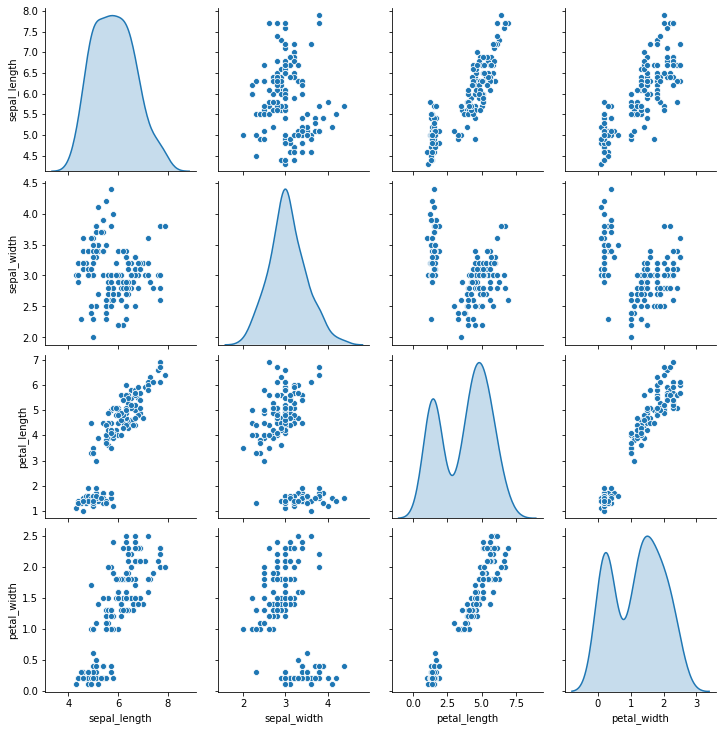



Correlation matrix of data from experiment named "First experiment":
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


Info about data types and amounts from experiment named "First experiment":
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


Descriptive statistics of data from experiment named

In [6]:
lab.analysis(name="First experiment", analysis_type="Standard", save=True)

                                 ---- Bootstrap analysis ----                                 


Kde-plot of data columns (petal_width, sepal_length, petal_length) from experiment named "First experiment":


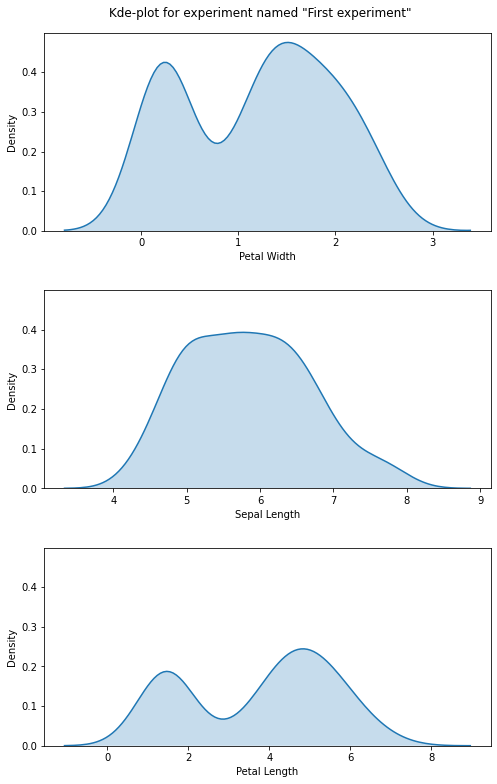

In [7]:
lab.analysis(name="First experiment", columns=['petal_width','sepal_length', 'petal_length'], analysis_type="Bootstrap", save=True)

                                 ---- Scatter analysis ----                                 


Scatter-plot of data columns (petal_width vs. sepal_length and petal_length vs. sepal_length)
from experiment named "First experiment":


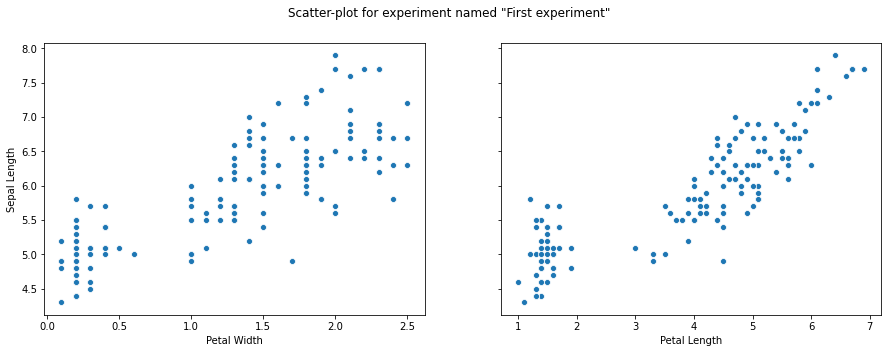

In [8]:
columnss=[['petal_width','sepal_length'], ['petal_length','sepal_length']]
lab.analysis(name="First experiment", columns=columnss, analysis_type="Scatter", save=True)

In [9]:
f = 10  # Frequency, in cycles per second, or Hertz
f_s = 1000  # Sampling rate, or number of measurements per second
interval = 2

xs = np.linspace(0, interval, interval * f_s)
sin = np.sin(f * 2 * np.pi * xs)

#xs = np.linspace(0,40,1000)
#sin = [np.sin(2*x) + np.random.normal(0,0.1) for x in xs]
df = pd.DataFrame({'xs': xs, 'sin': sin})

lab.add_experiment(df, name="Second experiment")

                                 ---- Frequency analysis ----                                 


Scatter-plot of data columns (xs vs. sin) from experiment named "Second experiment":


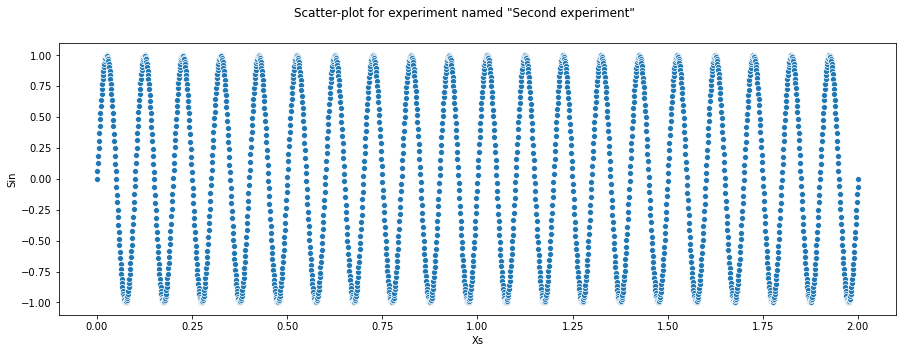



Frequency of data from experiment named "Second experiment":
Frequencies found for columns xs and sin from experiment named "Second experiment" given current tolerance, 0.5:  [ 10. -10.]
Given the above results, the avg frequency was found to be:  10.0


In [10]:
lab.analysis(name="Second experiment", columns=[['xs','sin']], analysis_type="Frequency", save=True)

In [11]:
lab.log()

List of changes performed during lab time:

  -  Nr. 1 experiment was added and called "First experiment". (Tue Dec 28 09:53:41 2021)

  -  Standard analysis was performed on experiment called "First experiment". (Tue Dec 28 09:53:44 2021)

  -  Bootstrap analysis was performed on experiment called "First experiment". (Tue Dec 28 09:53:46 2021)

  -  Scatter analysis was performed on experiment called "First experiment". (Tue Dec 28 09:53:46 2021)

  -  Nr. 2 experiment was added and called "Second experiment". (Tue Dec 28 09:53:46 2021)

  -  Frequency analysis was performed on experiment called "Second experiment". (Tue Dec 28 09:53:47 2021)


In [12]:
lab.add_note("Found mistakes in data collection",2)
lab.log()

List of changes performed during lab time:

  -  Nr. 1 experiment was added and called "First experiment". (Tue Dec 28 09:53:41 2021)
    -  Found mistakes in data collection

  -  Standard analysis was performed on experiment called "First experiment". (Tue Dec 28 09:53:44 2021)

  -  Bootstrap analysis was performed on experiment called "First experiment". (Tue Dec 28 09:53:46 2021)

  -  Scatter analysis was performed on experiment called "First experiment". (Tue Dec 28 09:53:46 2021)

  -  Nr. 2 experiment was added and called "Second experiment". (Tue Dec 28 09:53:46 2021)

  -  Frequency analysis was performed on experiment called "Second experiment". (Tue Dec 28 09:53:47 2021)


In [13]:
lab.experiments

{'First experiment':      sepal_length  sepal_width  petal_length  petal_width    species
 0             5.1          3.5           1.4          0.2     setosa
 1             4.9          3.0           1.4          0.2     setosa
 2             4.7          3.2           1.3          0.2     setosa
 3             4.6          3.1           1.5          0.2     setosa
 4             5.0          3.6           1.4          0.2     setosa
 ..            ...          ...           ...          ...        ...
 145           6.7          3.0           5.2          2.3  virginica
 146           6.3          2.5           5.0          1.9  virginica
 147           6.5          3.0           5.2          2.0  virginica
 148           6.2          3.4           5.4          2.3  virginica
 149           5.9          3.0           5.1          1.8  virginica
 
 [150 rows x 5 columns],
 'Second experiment':             xs           sin
 0     0.000000  0.000000e+00
 1     0.001001  6.282189e-02
 2

In [14]:
lab.update(data, name="First experiment")

                                 ---- Bootstrap analysis ----                                 


Kde-plot of data columns (petal_width, sepal_length, petal_length) from experiment named "First experiment":


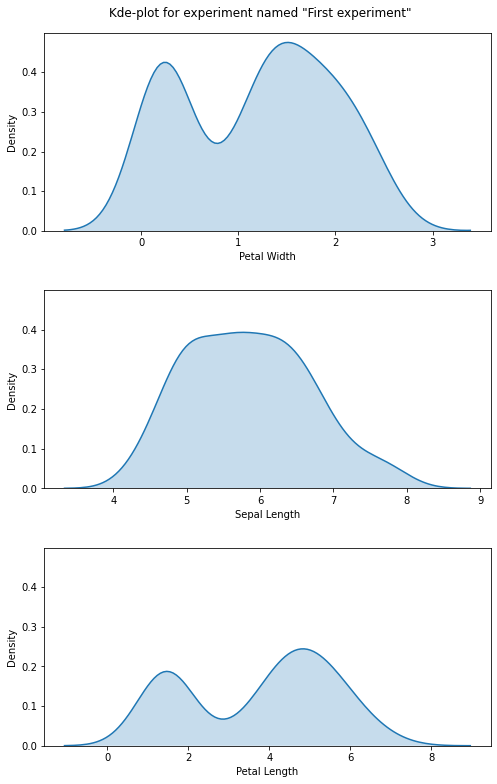

In [15]:
lab.analysis(name="First experiment", columns=['petal_width','sepal_length', 'petal_length'], analysis_type="Bootstrap", save=False)

In [16]:
lab.log()

List of changes performed during lab time:

  -  Nr. 1 experiment was added and called "First experiment". (Tue Dec 28 09:53:41 2021)
    -  Found mistakes in data collection

  -  Standard analysis was performed on experiment called "First experiment". (Tue Dec 28 09:53:44 2021)

  -  Bootstrap analysis was performed on experiment called "First experiment". (Tue Dec 28 09:53:46 2021)

  -  Scatter analysis was performed on experiment called "First experiment". (Tue Dec 28 09:53:46 2021)

  -  Nr. 2 experiment was added and called "Second experiment". (Tue Dec 28 09:53:46 2021)

  -  Frequency analysis was performed on experiment called "Second experiment". (Tue Dec 28 09:53:47 2021)

  -  Data from experiment called "First experiment" was changed. (Tue Dec 28 09:53:47 2021)

  -  Bootstrap analysis was performed on experiment called "First experiment". (Tue Dec 28 09:53:48 2021)


In [17]:
lab.clean(name="First experiment", columns=['petal_width','sepal_length', 'petal_length'], filename='cleaned_iris.csv')

This method does two things. Firstly, if provided, the value of the variable "pattern" is removed 
from all values of every column. The regex bool determines if pattern will be interpreted as a regex pattern.
Secondly it looks through every row of data from experiment named "First experiment", and
looks for values that it were not able to convert to a float, saves the index for that row,
and ultimately removes all rows that couldnt be converted to a float, and then converts every column to have float
values only. 


Are you sure you want to proceed (y/n)? y


Data cleaned...

Data uploaded...

Cleaning succesfully done!


                                 ---- Fitting ----                                 


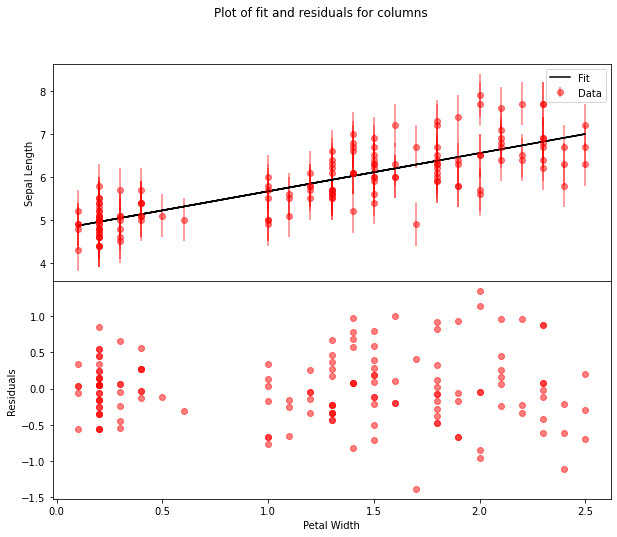



Fit of data from columns from experiment named "First experiment":


In fit nr. 1 the folowing optimal parameters was found:  [0.88858025 4.77762942]

The folowing errors was estimated for the optimal parameters:  [0.05137355 0.07293476]

----------------------------------------------------------------------------------------------


In [18]:
def func(x, a, b):
    return a*x + b

sigma = [[0.5]*150]

popts, perrs = lab.fit(name="First experiment", columns=[['petal_width','sepal_length']], funcs=[func], guesses=None, sigma=sigma, absolute_sigma=False, method=None, residuals=True, save=True)

                                 ---- Fitting ----                                 


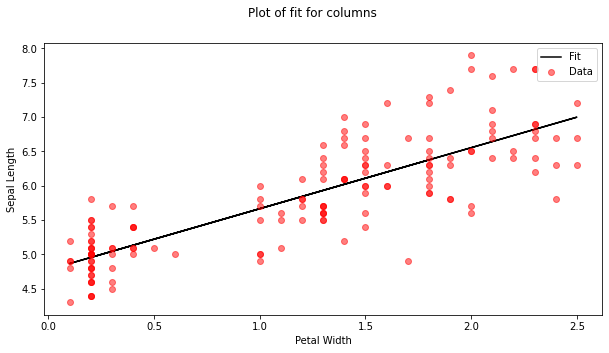



Fit of data from columns from experiment named "First experiment":


In fit nr. 1 the folowing optimal parameters was found:  [0.88858025 4.77762942]

The folowing errors was estimated for the optimal parameters:  [0.05137355 0.07293476]

----------------------------------------------------------------------------------------------


In [19]:
def func(x, a, b):
    return a*x + b

popts, perrs = lab.fit(name="First experiment", columns=[['petal_width','sepal_length']], funcs=[func], residuals=False, save=False)